In [7]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Загружаем данные
df = pd.read_csv('titanic.csv')



In [9]:
# 1. АНАЛИЗ ДАННЫХ

# Посмотрим общую информацию о датасете
print("Информация о датасете:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

# Проверим пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Первые 5 строк:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5     

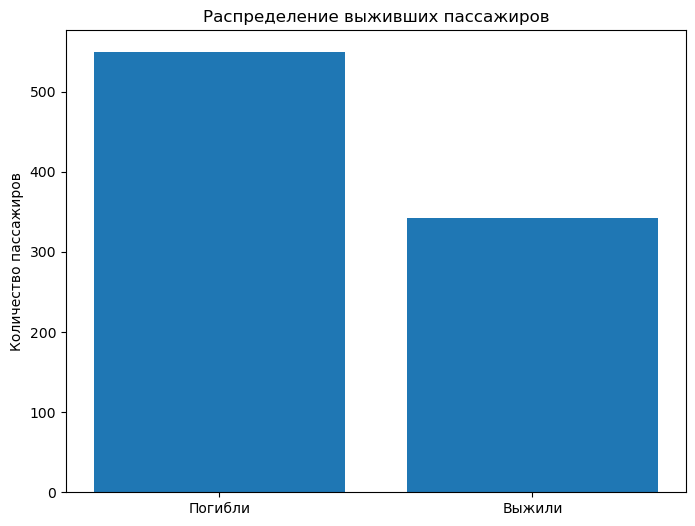

In [11]:
# Визуализация 1: Распределение выживших
plt.figure(figsize=(8, 6))
survived_counts = df['Survived'].value_counts()
plt.bar(['Погибли', 'Выжили'], survived_counts.values)
plt.title('Распределение выживших пассажиров')
plt.ylabel('Количество пассажиров')
plt.show()



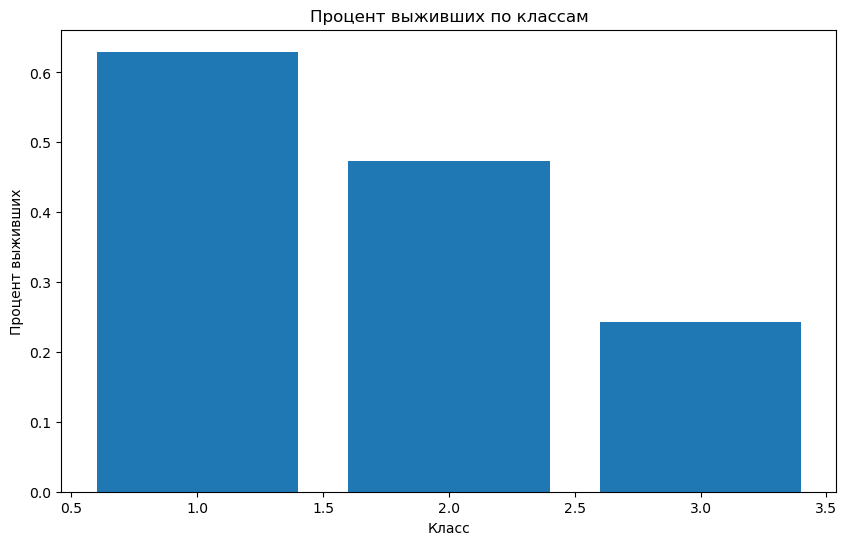

In [13]:
# Визуализация 2: Выживаемость по классам
plt.figure(figsize=(10, 6))
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_class.index, survival_by_class.values)
plt.title('Процент выживших по классам')
plt.xlabel('Класс')
plt.ylabel('Процент выживших')
plt.show()



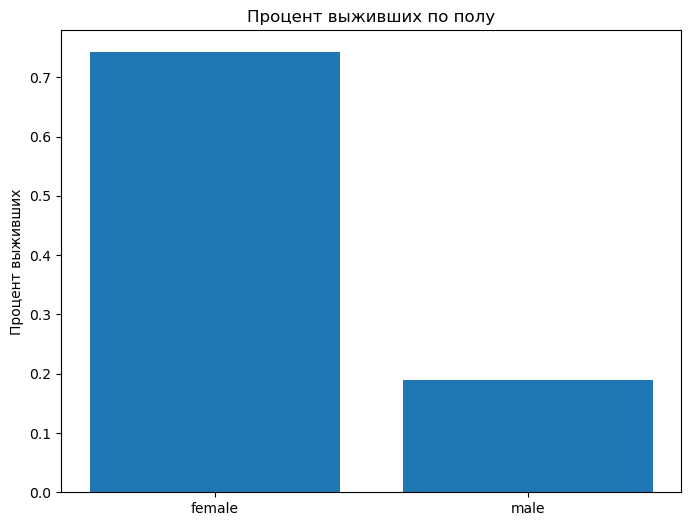

In [15]:
# Визуализация 3: Выживаемость по полу
plt.figure(figsize=(8, 6))
survival_by_sex = df.groupby('Sex')['Survived'].mean()
plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.title('Процент выживших по полу')
plt.ylabel('Процент выживших')
plt.show()



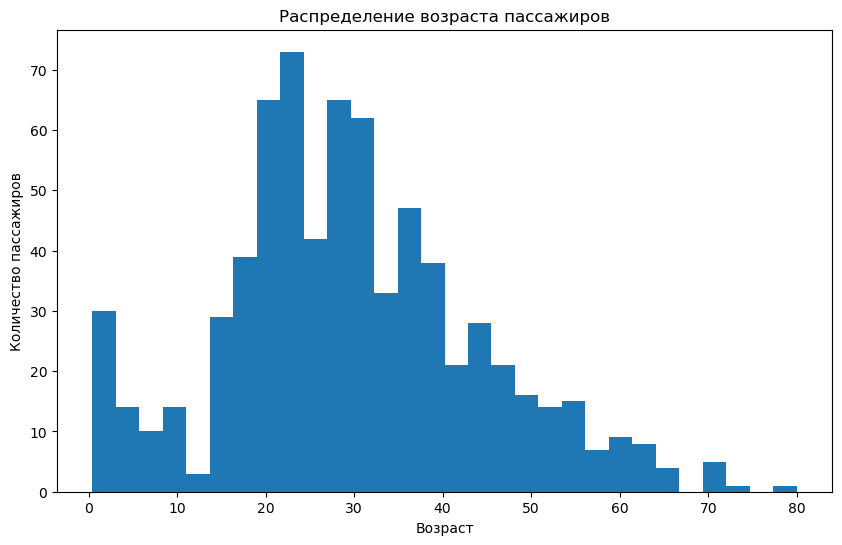

In [17]:
# Визуализация 4: Распределение возраста
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()



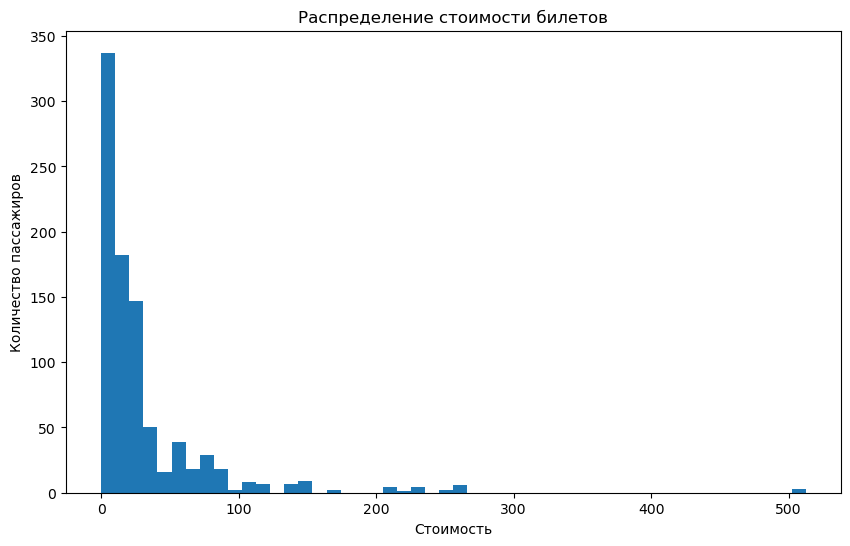

In [19]:
# Визуализация 5: Распределение стоимости билетов
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'].dropna(), bins=50)
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость')
plt.ylabel('Количество пассажиров')
plt.show()



In [21]:
# 2. FEATURE ENGINEERING

# Создаем копию датафрейма для обработки
df_processed = df.copy()

# Обработка пропущенных значений
# Заполняем пропуски в возрасте медианным значением
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)

# Создаем новые признаки
# Размер семьи
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

# Путешествует один или нет
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# Возрастные группы
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                bins=[0, 18, 35, 50, 100], 
                                labels=['Child', 'Young', 'Middle', 'Elder'])

# Категории стоимости билетов
df_processed['FareCategory'] = pd.qcut(df_processed['Fare'], 
                                     q=4, 
                                     labels=['Low', 'Medium', 'High', 'Very High'])

# Кодируем категориальные переменные
# Пол
df_processed['Sex'] = df_processed['Sex'].map({'female': 1, 'male': 0})

# Порт посадки
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df_processed['Embarked'] = df_processed['Embarked'].map(embarked_mapping)



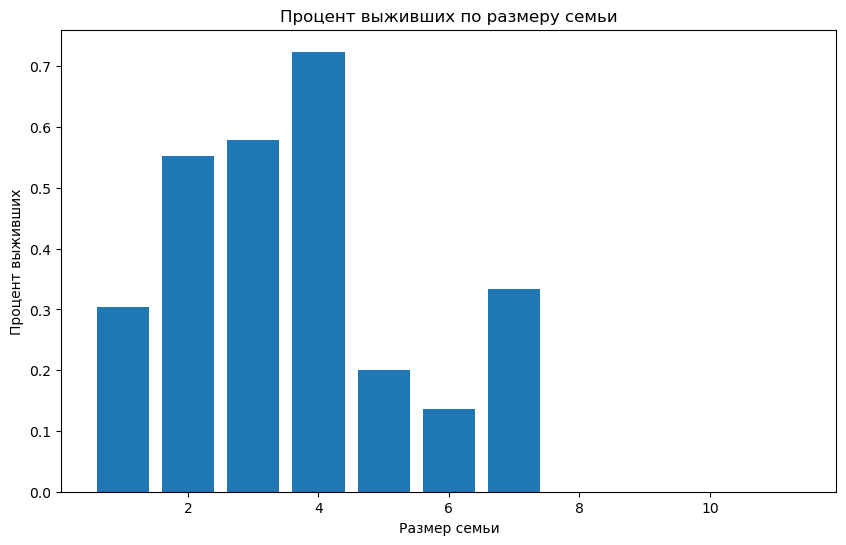

In [23]:
# Визуализация влияния новых признаков
# Выживаемость по размеру семьи
plt.figure(figsize=(10, 6))
survival_by_family = df_processed.groupby('FamilySize')['Survived'].mean()
plt.bar(survival_by_family.index, survival_by_family.values)
plt.title('Процент выживших по размеру семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Процент выживших')
plt.show()



In [ ]:
# Выживаемость одиноких пассажиров
plt.figure(figsize=(8, 6))
survival_by_alone = df_processed.groupby('IsAlone')['Survived'].mean()
plt.bar(['С семьей', 'Один'], survival_by_alone.values)
plt.title('Процент выживших: одинокие vs с семьей')
plt.ylabel('Процент выживших')
plt.show()

